# Capstone Two Project :  Single Stock Predicting

# 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import tree, metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 2. Loading the data

In [3]:
# import data
stocks= pd.read_csv('prices-split-adjusted.csv')
stocks

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


# 3. Data Wrangling

In [4]:
# check the first 5 lines of data
stocks.head() 

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
# check the last 5 lines of data
stocks.tail()

,date,symbol,open,close,low,high,volume
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [6]:
# Sort the stocks data by date
stocks = stocks.sort_values(by=['date'])
stocks

,date,symbol,open,close,low,high,volume
646,2010-01-04,SYMC,18.040001,18.400000,18.010000,18.530001,8322300.0
473,2010-01-04,IFF,41.509998,42.009998,41.500000,42.020000,286000.0
474,2010-01-04,ILMN,31.120001,30.549999,30.420000,31.230000,1793700.0
475,2010-01-04,INTC,20.790001,20.879999,20.730000,21.030001,47800900.0
476,2010-01-04,INTU,31.090000,30.809999,30.770000,31.150000,2353000.0
...,...,...,...,...,...,...,...
850922,2016-12-30,ES,55.599998,55.230000,55.070000,55.740002,1446800.0
850921,2016-12-30,EQT,65.699997,65.400002,65.050003,66.470001,1242100.0
850920,2016-12-30,EQR,63.590000,64.360001,63.189999,64.440002,1534000.0
850933,2016-12-30,EXR,75.669998,77.239998,75.110001,77.300003,884400.0


In [7]:
# check the name of the columns
stocks.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [8]:
#rename some columns to make it more recognizable
stocks.rename(columns={'symbol':'company'}, inplace=True)
stocks.head()

,date,company,open,close,low,high,volume
646,2010-01-04,SYMC,18.040001,18.400000,18.01,18.530001,8322300.0
473,2010-01-04,IFF,41.509998,42.009998,41.50,42.020000,286000.0
474,2010-01-04,ILMN,31.120001,30.549999,30.42,31.230000,1793700.0
475,2010-01-04,INTC,20.790001,20.879999,20.73,21.030001,47800900.0
476,2010-01-04,INTU,31.090000,30.809999,30.77,31.150000,2353000.0


In [9]:
# check how many rows and columns
stocks.shape

(851264, 7)

In [10]:
# check the genal information about the data
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851264 entries, 646 to 851263
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     851264 non-null  object 
 1   company  851264 non-null  object 
 2   open     851264 non-null  float64
 3   close    851264 non-null  float64
 4   low      851264 non-null  float64
 5   high     851264 non-null  float64
 6   volume   851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 52.0+ MB


In [11]:
# confirm if there is any null value
stocks.isnull().sum()

date       0
company    0
open       0
close      0
low        0
high       0
volume     0
dtype: int64

In [12]:
# we can use stocks['column'].fillna(stocks['column'].mean(), inplace=True) to fill null value if there was any.
# stocks['column'].fillna(method='ffill', inplace=True)
# df.fillna(method='bfill', inplace=True)
# df.fillna(df.mean(numeric_only=True).round(1), inplace=True)  For mean
# df.fillna(df.median(numeric_only=True).round(1), inplace=True)  For median

In [13]:
# describe the data in statistic form
stocks.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [14]:
# check of there is any duplicated data
stocks.duplicated().any()

False

In [15]:
# If the output is True, We can use stocks.drop_duplicates() to get rid of duplicated values

In [16]:
#check the unique value of some columns
stocks['company'].unique()

array(['SYMC', 'IFF', 'ILMN', 'INTC', 'INTU', 'IP', 'IPG', 'IR', 'IRM',
       'IDXX', 'ISRG', 'IVZ', 'JBHT', 'JCI', 'JEC', 'JNJ', 'JNPR', 'JPM',
       'JWN', 'ITW', 'K', 'ICE', 'HUM', 'HBAN', 'HBI', 'HCN', 'HCP', 'HD',
       'HES', 'HIG', 'HOG', 'IBM', 'HOLX', 'HP', 'HPQ', 'HRB', 'HRL',
       'HRS', 'HSIC', 'HST', 'HSY', 'HON', 'KEY', 'KIM', 'KLAC', 'M',
       'MA', 'MAC', 'MAR', 'MAS', 'MAT', 'MCD', 'MCHP', 'LVLT', 'MCK',
       'MDLZ', 'MDT', 'MET', 'MHK', 'MJN', 'MKC', 'MLM', 'MMC', 'MCO',
       'LUV', 'LUK', 'LRCX', 'KMB', 'KMX', 'KO', 'KR', 'KSS', 'KSU', 'L',
       'LB', 'LEG', 'LEN', 'LH', 'LKQ', 'LLL', 'LLTC', 'LLY', 'LMT',
       'LNC', 'LNT', 'LOW', 'HAS', 'HAR', 'HAL', 'GWW', 'DTE', 'DUK',
       'DVA', 'DVN', 'EA', 'EBAY', 'ECL', 'ED', 'DRI', 'EFX', 'EL', 'EMN',
       'EMR', 'ENDP', 'EOG', 'EQIX', 'EQR', 'EQT', 'EIX', 'DPS', 'DOW',
       'DOV', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE', 'DFS',
       'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DLR

In [17]:
# Isolate google stocks
google = stocks[stocks.company == 'GOOG']
google

,date,company,open,close,low,high,volume
439,2010-01-04,GOOG,312.304948,312.205308,310.955001,313.580158,3927000.0
907,2010-01-05,GOOG,312.419511,310.830459,309.610028,312.748278,6031900.0
1375,2010-01-06,GOOG,311.761979,302.994813,302.048370,311.761979,7987100.0
1843,2010-01-07,GOOG,303.562685,295.941242,295.218951,303.861575,12876600.0
2311,2010-01-08,GOOG,294.895159,299.886470,293.455551,300.499172,9483900.0
...,...,...,...,...,...,...,...
848963,2016-12-23,GOOG,790.900024,789.909973,787.280029,792.739990,623400.0
849463,2016-12-27,GOOG,790.679993,791.549988,787.656982,797.859985,789100.0
849963,2016-12-28,GOOG,793.700012,785.049988,783.200012,794.229980,1132700.0
850463,2016-12-29,GOOG,783.330017,782.789978,778.919983,785.929993,742200.0


# 4. Exploratory Data Analysis And Visualization

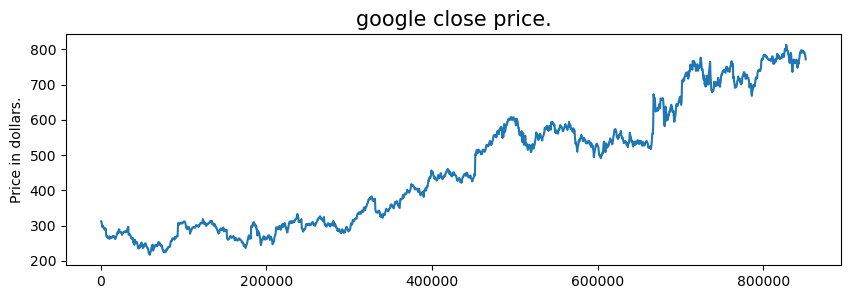

In [18]:

plt.figure(figsize=(10,3))
plt.plot(google['close'])
plt.title('google close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

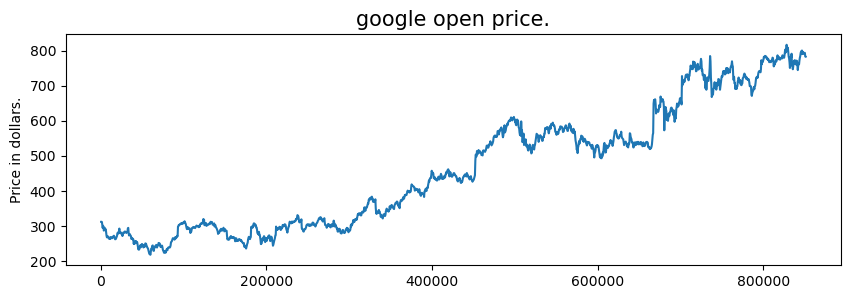

In [19]:
plt.figure(figsize=(10,3))
plt.plot(google['open'])
plt.title('google open price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [20]:
#google_stock=google.drop(['company'], axis=1)
#google_stock.head()

/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/3770528432.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/3770528432.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(google[col])
/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/3770528432.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure

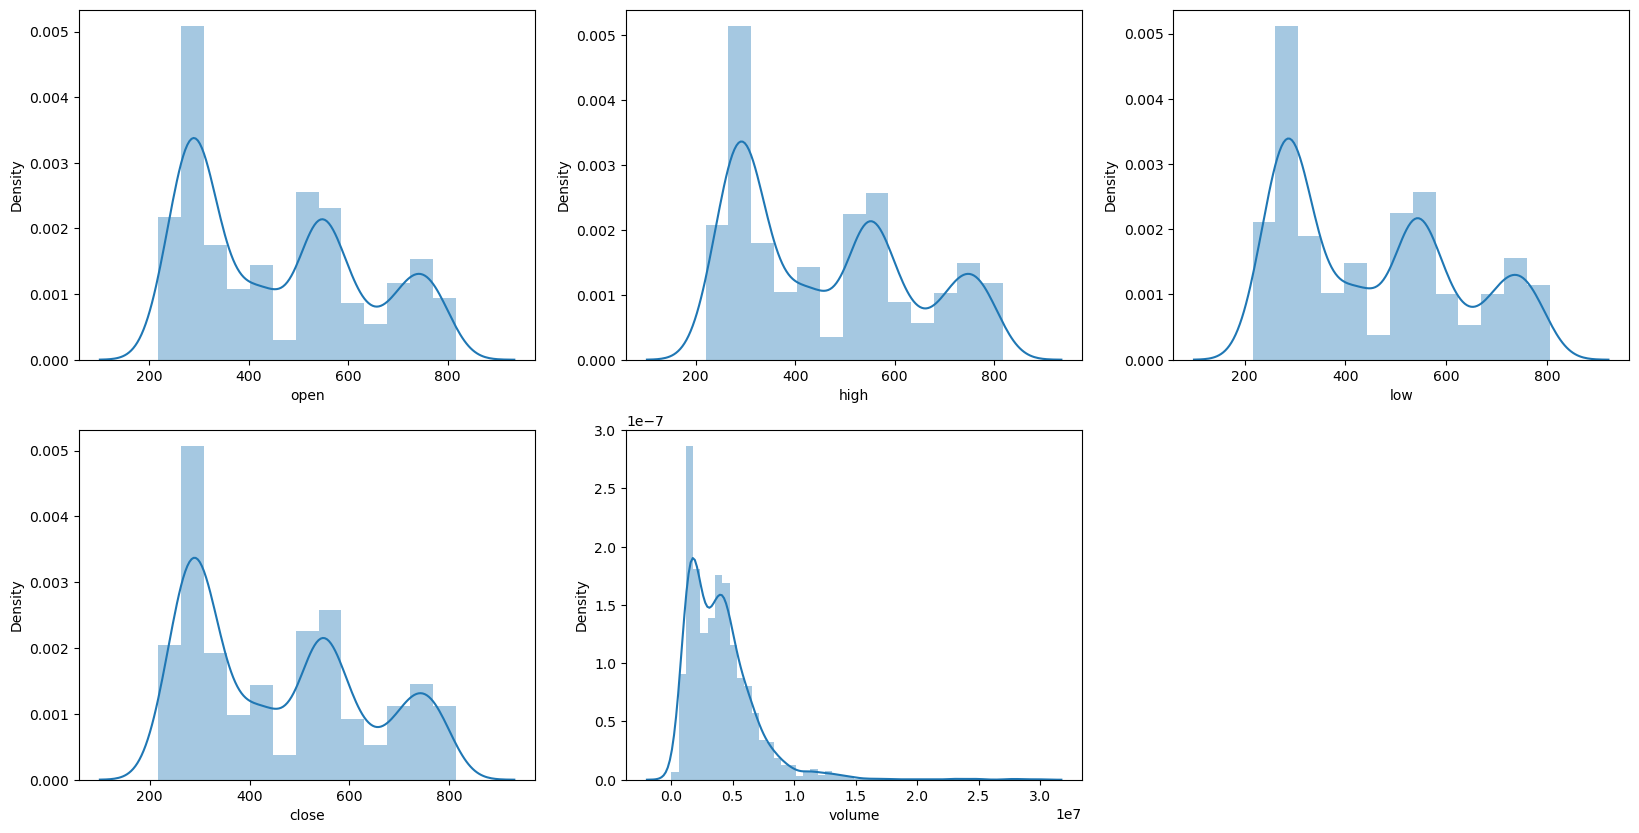

In [21]:
list = ['open', 'high', 'low', 'close', 'volume']
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(list):
  plt.subplot(2,3,i+1)
  sns.distplot(google[col])
plt.show()

/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/2878263432.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


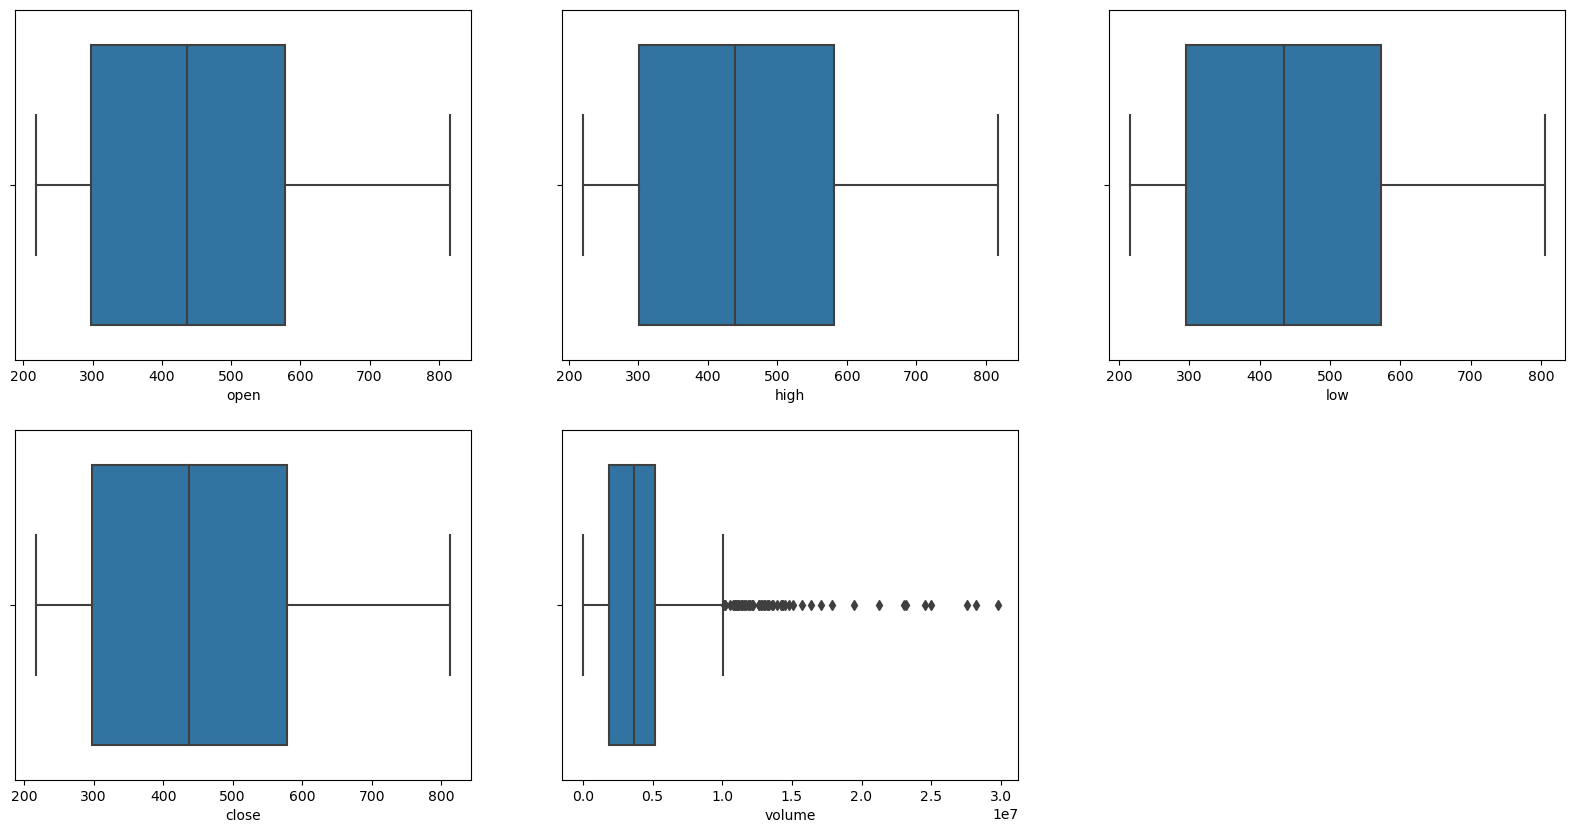

In [22]:
list = ['open', 'high', 'low', 'close', 'volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(list):
  plt.subplot(2,3,i+1)
  sns.boxplot(x=google[col])
plt.show()

In [23]:
#Now we add three more columns namely ‘day’, ‘month’ and ‘year’.
#All these three have been derived from the ‘Date’ column which was initially provided in the data.

split = google['date'].str.split('-', expand=True)
 
google['year'] = split[0].astype('int')
google['month'] = split[1].astype('int')
google['day'] = split[2].astype('int')
 
google.head(15)

/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/1589962475.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['year'] = split[0].astype('int')
/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/1589962475.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['month'] = split[1].astype('int')
/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/1589962475.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,date,company,open,close,low,high,volume,year,month,day
439,2010-01-04,GOOG,312.304948,312.205308,310.955001,313.580158,3927000.0,2010,1,4
907,2010-01-05,GOOG,312.419511,310.830459,309.610028,312.748278,6031900.0,2010,1,5
1375,2010-01-06,GOOG,311.761979,302.994813,302.048370,311.761979,7987100.0,2010,1,6
1843,2010-01-07,GOOG,303.562685,295.941242,295.218951,303.861575,12876600.0,2010,1,7
2311,2010-01-08,GOOG,294.895159,299.886470,293.455551,300.499172,9483900.0,2010,1,8
2779,2010-01-11,GOOG,301.101926,299.433161,295.911366,301.101926,14479800.0,2010,1,11
3247,2010-01-12,GOOG,297.709617,294.138017,292.902633,297.963676,9742900.0,2010,1,12
3715,2010-01-13,GOOG,287.169102,292.449324,285.878939,293.091933,13041800.0,2010,1,13
4183,2010-01-14,GOOG,290.860270,293.824173,290.317331,295.991047,8511900.0,2010,1,14
4651,2010-01-15,GOOG,295.562671,288.917549,287.941229,295.672260,10909600.0,2010,1,15


In [24]:
# Add new colunm 'quarter_end'
google['quarter_end'] = np.where(google['month']%3==0,1,0)
google.head(50)

/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/4160180431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['quarter_end'] = np.where(google['month']%3==0,1,0)


,date,company,open,close,low,high,volume,year,month,day,quarter_end
439,2010-01-04,GOOG,312.304948,312.205308,310.955001,313.580158,3927000.0,2010,1,4,0
907,2010-01-05,GOOG,312.419511,310.830459,309.610028,312.748278,6031900.0,2010,1,5,0
1375,2010-01-06,GOOG,311.761979,302.994813,302.048370,311.761979,7987100.0,2010,1,6,0
1843,2010-01-07,GOOG,303.562685,295.941242,295.218951,303.861575,12876600.0,2010,1,7,0
2311,2010-01-08,GOOG,294.895159,299.886470,293.455551,300.499172,9483900.0,2010,1,8,0
2779,2010-01-11,GOOG,301.101926,299.433161,295.911366,301.101926,14479800.0,2010,1,11,0
3247,2010-01-12,GOOG,297.709617,294.138017,292.902633,297.963676,9742900.0,2010,1,12,0
3715,2010-01-13,GOOG,287.169102,292.449324,285.878939,293.091933,13041800.0,2010,1,13,0
4183,2010-01-14,GOOG,290.860270,293.824173,290.317331,295.991047,8511900.0,2010,1,14,0
4651,2010-01-15,GOOG,295.562671,288.917549,287.941229,295.672260,10909600.0,2010,1,15,0


/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/3957979931.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupe_year = google.groupby('year').mean()
/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/3957979931.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


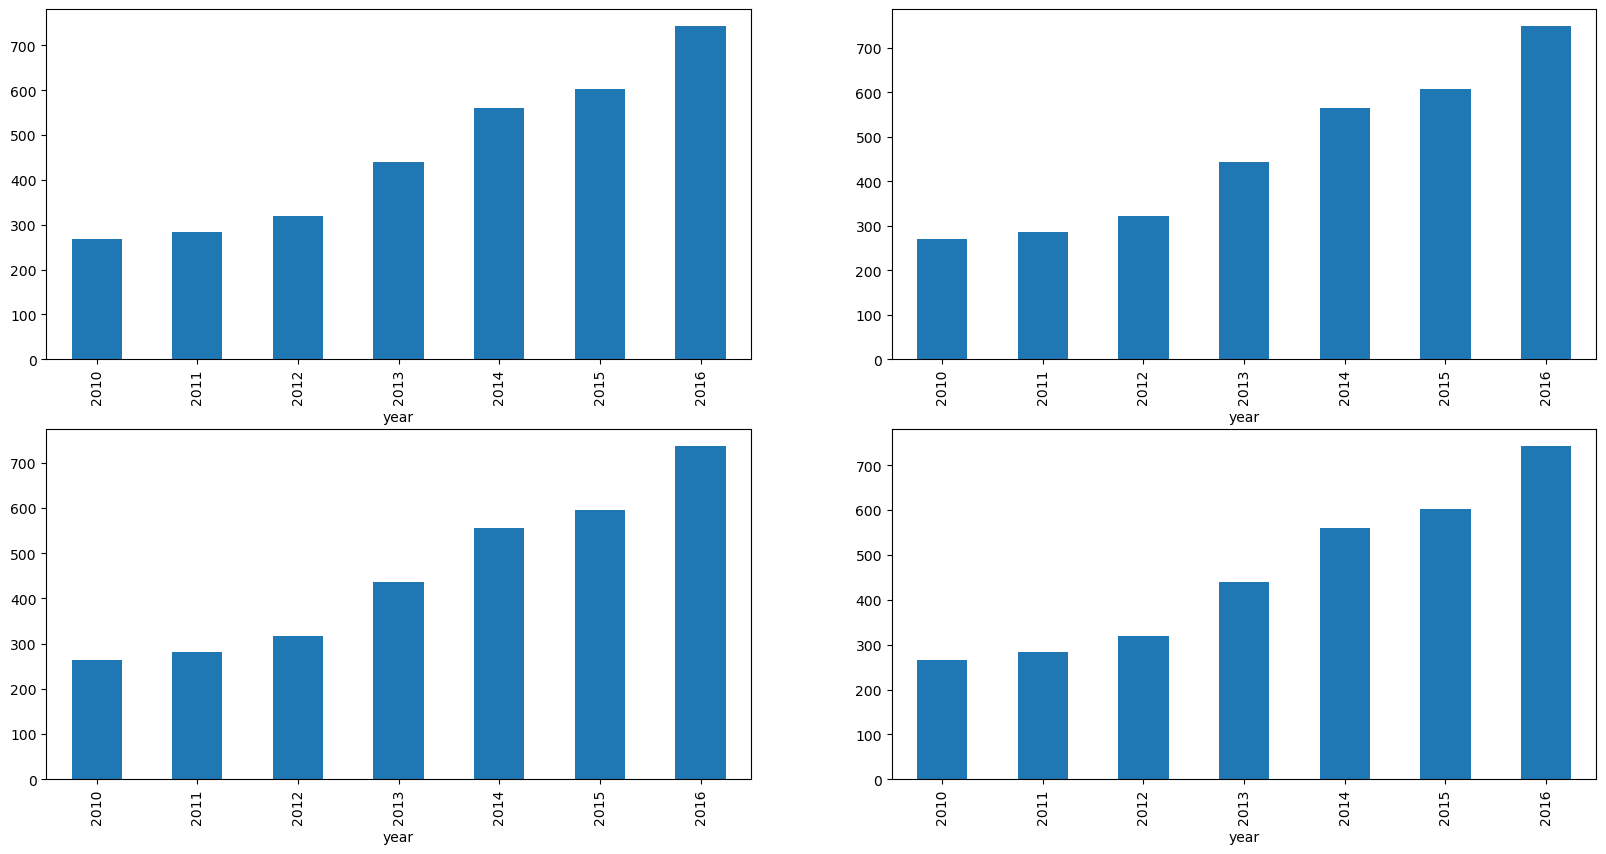

In [25]:
# We group the stocks by year
groupe_year = google.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['open', 'high', 'low', 'close']):
  plt.subplot(2,2,i+1)
  groupe_year[col].plot.bar()
plt.show()

In [26]:
# check the mean value of the quarter_end column
google.groupby('quarter_end').mean()

/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/1161024700.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  google.groupby('quarter_end').mean()


,open,close,low,high,volume,year,month,day
quarter_end,,,,,,,,
0,457.205741,457.005730,452.905622,461.059434,4.265732e+06,2013.004288,6.087479,15.687822
1,464.894651,464.726835,461.046288,468.228195,3.631434e+06,2012.994966,7.454698,15.736577


In [27]:
google['open-close']  = google['open'] - google['close']
google['low-high']  = google['low'] - google['high']
google['target'] = np.where(google['close'].shift(-1) > google['close'], 1, 0)

/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/2684930414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['open-close']  = google['open'] - google['close']
/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/2684930414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['low-high']  = google['low'] - google['high']
/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/2684930414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

<Axes: >

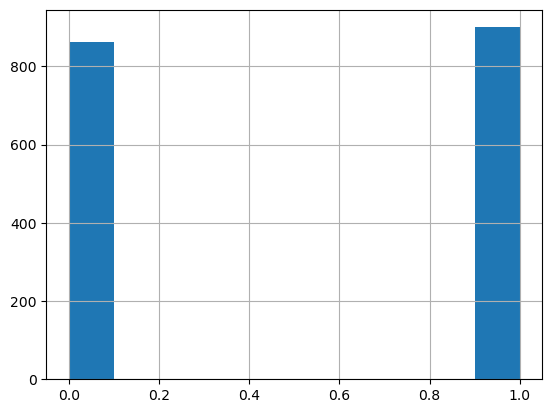

In [28]:
google['target'].hist()

/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_10410/3600277821.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(google.corr() > 0.9, annot=True)


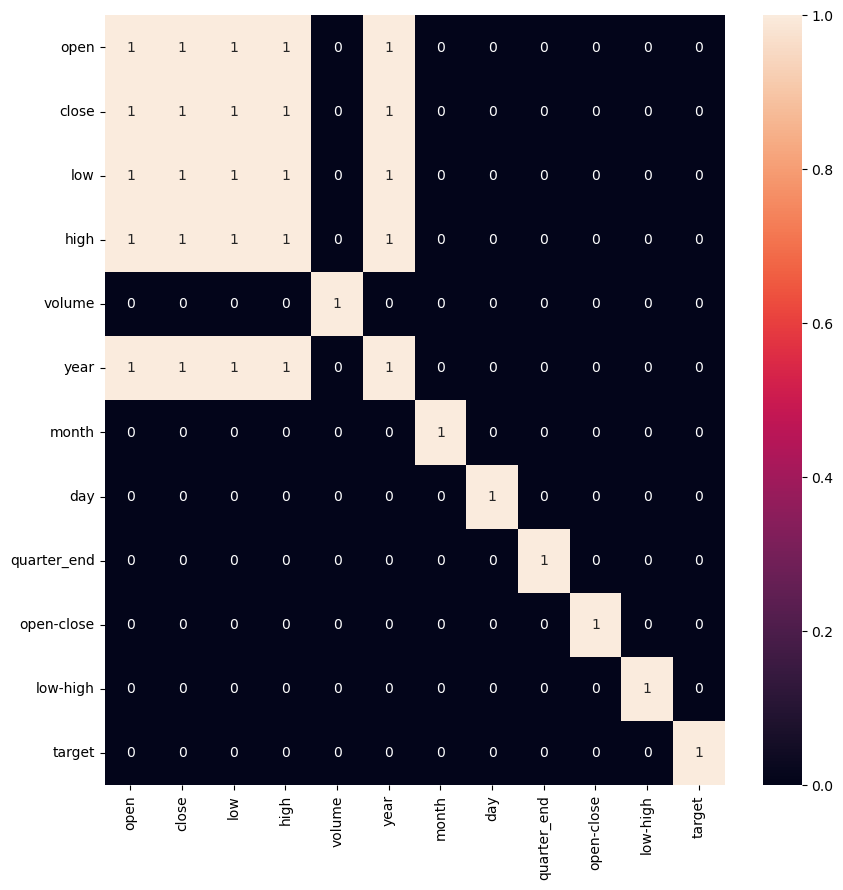

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(google.corr() > 0.9, annot=True)
plt.show()